In [61]:
import sys
import subprocess
import pandas as pd

dosing = [3]
half_life = [0]
k_max = [0.999]
ec50 = [0.75]
n = [20]

pop_size = [10000]

cmd = ['../../cmake-build-release/bin/EfficacyEstimator.exe', '-d'] + dosing + ['-t']+ half_life+ ['-k'] + k_max+ ['-e']+ ec50+ ['-n']+ n + ['-i', '../../misc/input_ee.yml', '-p']+ pop_size

cmd = map(str,cmd)

# a= subprocess.check_output(cmd)
a = subprocess.Popen(cmd, stdout=subprocess.PIPE)

if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

b = StringIO(a.communicate()[0].decode('utf-8'))

df = pd.read_csv(b, sep=",", header=None)

#df

In [62]:
log10_detectable = 1
 
parasitaemia = df.iloc[29,1:1 + pop_size[0]]

eff = parasitaemia[parasitaemia < log10_detectable].count() / pop_size[0]
print("Efficacy : ",eff)


Efficacy :  0.6963


<AxesSubplot:>

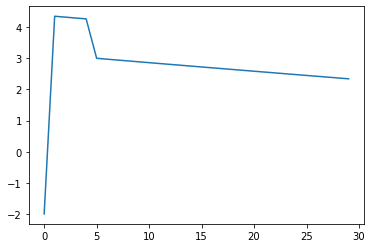

In [64]:
# %matplotlib qt 
df[2].plot()


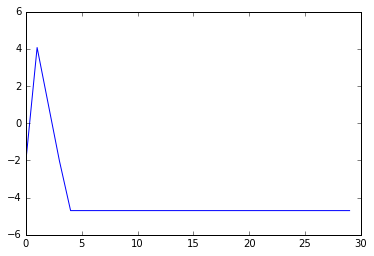

In [68]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

plt.plot(df[0], df[1])